# STAT 301 - Group 20 - Calvin Du, 

# Section 1: Data Description

In [14]:
library(tidyverse)
library(broom)
library(glmnet)
library(dplyr)

In [3]:
set.seed(30120)

In [15]:
data <- read.table('dataset-uci.csv', header = TRUE, sep = ",", stringsAsFactors = FALSE)

colnames(data) <- colnames(data) %>%
tolower() %>%
str_replace_all("\\s+", "_") %>%
str_replace_all("[^a-z0-9_]", "") %>%
str_replace("^([0-9])", "x\\1")
data %>% head()
cat("Column names:\n")
colnames(data)

cat("\nNumber of columns:\n")
print(length(colnames(data)))

cat("\nNumber of rows:\n")
print(nrow(data))


,xgallstonestatus,age,gender,comorbidity,coronaryarterydiseasecad,hypothyroidism,hyperlipidemia,diabetesmellitusdm,height,weight,...,highdensitylipoproteinhdl,triglyceride,aspartataminotransferazast,alaninaminotransferazalt,alkalinephosphatasealp,creatinine,glomerularfiltrationrategfr,creactiveproteincrp,hemoglobinhgb,vitamind
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,50,0,0,0,0,0,0,185,92.8,...,40,134,20,22,87,0.82,112.47,0,16.0,33.0
2,0,47,0,1,0,0,0,0,176,94.5,...,43,103,14,13,46,0.87,107.10,0,14.4,25.0
3,0,61,0,0,0,0,0,0,171,91.1,...,43,69,18,14,66,1.25,65.51,0,16.2,30.2
4,0,41,0,0,0,0,0,0,168,67.7,...,59,53,20,12,34,1.02,94.10,0,15.4,35.4
5,0,42,0,0,0,0,0,0,178,89.6,...,30,326,27,54,71,0.82,112.47,0,16.8,40.6
6,0,96,0,0,0,0,0,0,155,49.0,...,30,65,13,13,60,1.46,43.74,0,11.0,45.8


Column names:


[1] "xgallstonestatus"                      
 [2] "age"                                   
 [3] "gender"                                
 [4] "comorbidity"                           
 [5] "coronaryarterydiseasecad"              
 [6] "hypothyroidism"                        
 [7] "hyperlipidemia"                        
 [8] "diabetesmellitusdm"                    
 [9] "height"                                
[10] "weight"                                
[11] "bodymassindexbmi"                      
[12] "totalbodywatertbw"                     
[13] "extracellularwaterecw"                 
[14] "intracellularwatericw"                 
[15] "extracellularfluidtotalbodywaterecftbw"
[16] "totalbodyfatratiotbfr"                 
[17] "leanmasslm"                            
[18] "bodyproteincontentprotein"             
[19] "visceralfatratingvfr"                  
[20] "bonemassbm"                            
[21] "musclemassmm"                          
[22] "obesity"                               
[23] "totalfatcontenttfc"                    
[24] "visceralfatareavfa"                    
[25] "visceralmuscleareavmakg"               
[26] "hepaticfataccumulationhfa"             
[27] "glucose"                               
[28] "totalcholesteroltc"                    
[29] "lowdensitylipoproteinldl"              
[30] "highdensitylipoproteinhdl"             
[31] "triglyceride"                          
[32] "aspartataminotransferazast"            
[33] "alaninaminotransferazalt"              
[34] "alkalinephosphatasealp"                
[35] "creatinine"                            
[36] "glomerularfiltrationrategfr"           
[37] "creactiveproteincrp"                   
[38] "hemoglobinhgb"                         
[39] "vitamind"


Number of columns:
[1] 39

Number of rows:
[1] 319


### Dataset Summary

- **Dataset name:** Gallstone-1
- **Source:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/1150/gallstone-1)
- **Number of observations:** 319
- **Number of variables:** 39


| Variable | Description | Type |
|-----------|--------------|------|
| xgallstonestatus | Presence of gallstones | Categorical|
| age | Age | Numeric|
| gender | Gender | Categorical |
| comorbidity | Presence of comorbid diseases | Categorical |
| coronaryarterydiseasecad | Coronary artery disease status | Categorical|
| hypothyroidism | Hypothyroidism status | Categorical|
| hyperlipidemia | Hyperlipidemia status | Categorical|
| diabetesmellitusdm | Diabetes mellitus status | Categorical|
| height, weight, bodymassindexbmi | Anthropometric measures | Numeric |
| totalbodywatertbw, extracellularwaterecw, intracellularwatericw, extracellularfluidtotalbodywaterecftbw | Body water and fluid distribution metrics | Numeric |
| totalbodyfatratiotbfr, leanmasslm, bodyproteincontentprotein, visceralfatratingvfr, bonemassbm, musclemassmm, obesity, totalfatcontenttfc, visceralfatareavfa, visceralmuscleareavmakg | Body composition metrics | Numeric |
| hepaticfataccumulationhfa | Liver fat accumulation indicator | Numeric |
| glucose, totalcholesteroltc, lowdensitylipoproteinldl, highdensitylipoproteinhdl, triglyceride | Blood biochemistry | Numeric |
| aspartataminotransferazast, alaninaminotransferazalt, alkalinephosphatasealp, creatinine, glomerularfiltrationrategfr, creactiveproteincrp, hemoglobinhgb, vitamind | Liver and kidney biomarkers | Numeric |


### Source and Information
- Data were collected prospectively from patients at Ankara VM Medical Park Hospital (June 2022 – June 2023).

- There were 454 participants but 134 individuals who had gallbladder surgery were omitted -> leading to 319 entries. Then 161 had gallstones and 158 were demmed healthy controls. (Esen et al., 2024).

- Each participant underwent clinical tests including bioimpedance analysis (BIA), blood laboratory tests, and ultrasound screening for gallstones in order to gather features

### Pre-selection of Variables
Some variables are highly correlated or redundant and we may remove. I grouped some of these variables above but here are some more concrete examples: 

- `height` and `weight` are represented by `bodymassindexbmi`

- `totalbodywatertbw`, `extracellularwaterecw`, and `intracellularwatericw` are collinear measures of hydration

- There's some scientific terms I don't really understand, but some prelimary factors showed that variables under binary comorbidity indicators (`coronaryarterydiseasecad`, `diabetesmellitusdm`, etc.) can be summed into a single index as they represent the same thing


# Section 2: Scientific Question

### The question we'll aim for is: 

We want to examine the association between a person's total body water (L) (response) and predictors related to lean mass, gender and body fat ratio and other proportional measurements.

**Response variable:** `totalbodywatertbw`  

**Explanatory variables:** In stage 2 of Calvin's project he used: `leanmasslm`, `totalbodyfatratiotbfr`, `gender`, `height`, `weight`, `bodymassindexbmi` but we will explore which variables can be used using Lasso Regression.

**Model type:** Multiple Linear Regression

**Focus:** Inference — to identify which body composition features contribute most to totalbodywatertbw


# Section 3: EDA and Visualization

In [16]:
df <- read.table('dataset-uci.csv', header = TRUE, sep = ",", stringsAsFactors = FALSE)

colnames(df) <- colnames(df) %>%
tolower() %>%
str_replace_all("\\s+", "_") %>%
str_replace_all("[^a-z0-9_]", "") %>%
str_replace("^([0-9])", "x\\1")

# Convert categorical variables to factors
df <- df %>%
  mutate(
    gender = as.factor(gender),
    comorbidity = as.factor(comorbidity),
    hepaticfataccumulationhfa = as.factor(hepaticfataccumulationhfa)
  )

df$gender <- factor(df$gender,
                  levels = c(0, 1),
                  labels = c("Male", "Female"))

  
df %>% head()

,xgallstonestatus,age,gender,comorbidity,coronaryarterydiseasecad,hypothyroidism,hyperlipidemia,diabetesmellitusdm,height,weight,...,highdensitylipoproteinhdl,triglyceride,aspartataminotransferazast,alaninaminotransferazalt,alkalinephosphatasealp,creatinine,glomerularfiltrationrategfr,creactiveproteincrp,hemoglobinhgb,vitamind
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,50,Male,0,0,0,0,0,185,92.8,...,40,134,20,22,87,0.82,112.47,0,16.0,33.0
2,0,47,Male,1,0,0,0,0,176,94.5,...,43,103,14,13,46,0.87,107.10,0,14.4,25.0
3,0,61,Male,0,0,0,0,0,171,91.1,...,43,69,18,14,66,1.25,65.51,0,16.2,30.2
4,0,41,Male,0,0,0,0,0,168,67.7,...,59,53,20,12,34,1.02,94.10,0,15.4,35.4
5,0,42,Male,0,0,0,0,0,178,89.6,...,30,326,27,54,71,0.82,112.47,0,16.8,40.6
6,0,96,Male,0,0,0,0,0,155,49.0,...,30,65,13,13,60,1.46,43.74,0,11.0,45.8


# Lasso Regression to Determine Model Fit

In order to determine the best variables to use in our model, we will proceed with utilizing lasso regression to narrow down which variables have the strongest predictive ability.

In [39]:
y <- df$totalbodywatertbw
X <- model.matrix(totalbodywatertbw ~ ., data = df)[, -1, drop = FALSE]

set.seed(30120)
# get lasso model with cross-validation
lasso <- cv.glmnet(X, y, alpha = 1, standardize = TRUE)

lambda_min <- lasso$lambda.min

# Coefficients
coef_min <- coef(lasso, s = lambda_min)

selected_min <- setdiff(rownames(coef_min)[as.numeric(coef_min) != 0], "(Intercept)")

print(selected_min)

[1] "genderFemale"                          
[2] "extracellularwaterecw"                 
[3] "extracellularfluidtotalbodywaterecftbw"
[4] "musclemassmm"                          
[5] "visceralmuscleareavmakg"               


The model selected body composition variables that intuitively strongly associate with Total Body Water. Our final model will include sex (female with male as the baseline), extracellular water (ECW), the extracellular fluid ratio (ECF/TBW), muscle mass (MM), and visceral muscle area (VMA). 

All of these variables do make sense as well as water is primarily stored in muscle tissue so therefore, predictors reflecting muscle quantity (MM, VMA) strongly contribute. Hydration distribution (ECW, ECF/TBW) provides additional information regarding fluid balance and sex also remains significant, as women naturally have lower TBW relative to men due to body-composition differences.

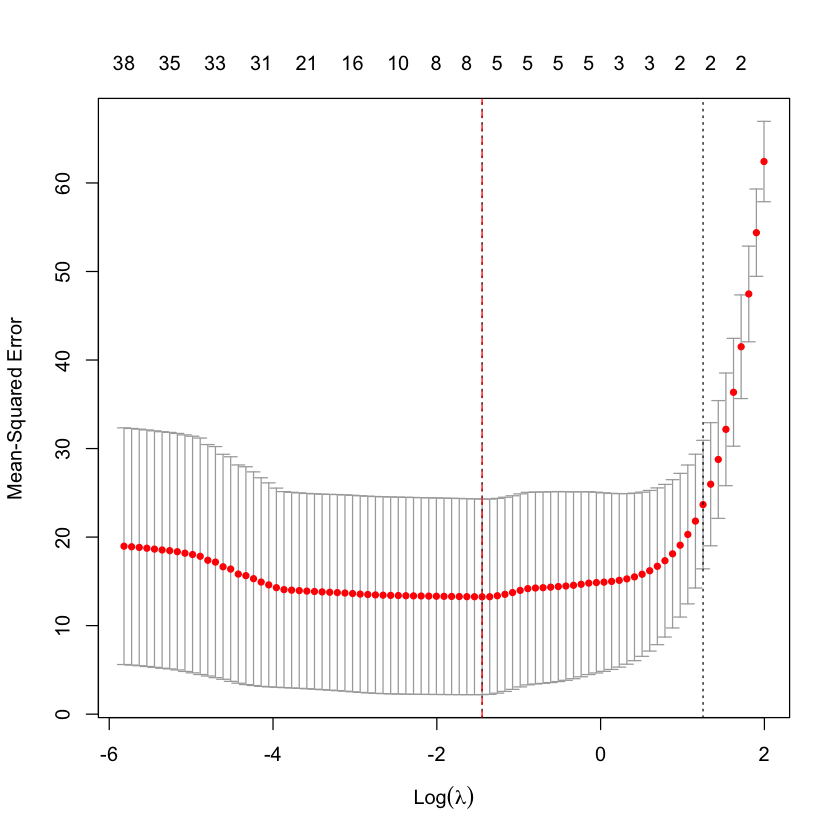

In [36]:
plot(lasso)
abline(v = log(lasso$lambda.min), col="red", lty=2)

The CV LASSO curve shows that moderate regularization achieves the lowest prediction error. The optimal penalty parameter which is defined as $\lambda_{min}$ yields a model containing five physiologically meaningful predictors of Total Body Water.

In [42]:
# Model we will use: 
model <- lm(formula = totalbodywatertbw ~ gender + extracellularwaterecw + extracellularfluidtotalbodywaterecftbw + musclemassmm + visceralmuscleareavmakg, data = df)
tidy(summary(model))
summary(model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),34.44094243,3.02747669,11.3761214,2.498116e-25
genderFemale,0.04683711,0.34824263,0.1344956,8.930971e-01
extracellularwaterecw,2.33863118,0.13404327,17.4468373,4.323713e-48
extracellularfluidtotalbodywaterecftbw,-0.83414268,0.06791354,-12.2824211,1.439999e-28
musclemassmm,-0.00957481,0.03969965,-0.2411812,8.095726e-01
visceralmuscleareavmakg,0.06351747,0.05155515,1.2320295,2.188628e-01



Call:
lm(formula = totalbodywatertbw ~ gender + extracellularwaterecw + 
    extracellularfluidtotalbodywaterecftbw + musclemassmm + visceralmuscleareavmakg, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.0123  -0.3281  -0.0066   0.3097  14.9322 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            34.440942   3.027477  11.376   <2e-16
genderFemale                            0.046837   0.348243   0.134    0.893
extracellularwaterecw                   2.338631   0.134043  17.447   <2e-16
extracellularfluidtotalbodywaterecftbw -0.834143   0.067914 -12.282   <2e-16
musclemassmm                           -0.009575   0.039700  -0.241    0.810
visceralmuscleareavmakg                 0.063517   0.051555   1.232    0.219
                                          
(Intercept)                            ***
genderFemale                              
extracellularwaterecw                 

# Plots

### Exploring Muscle mass vs Total Body Water by Gender

`geom_smooth()` using formula = 'y ~ x'


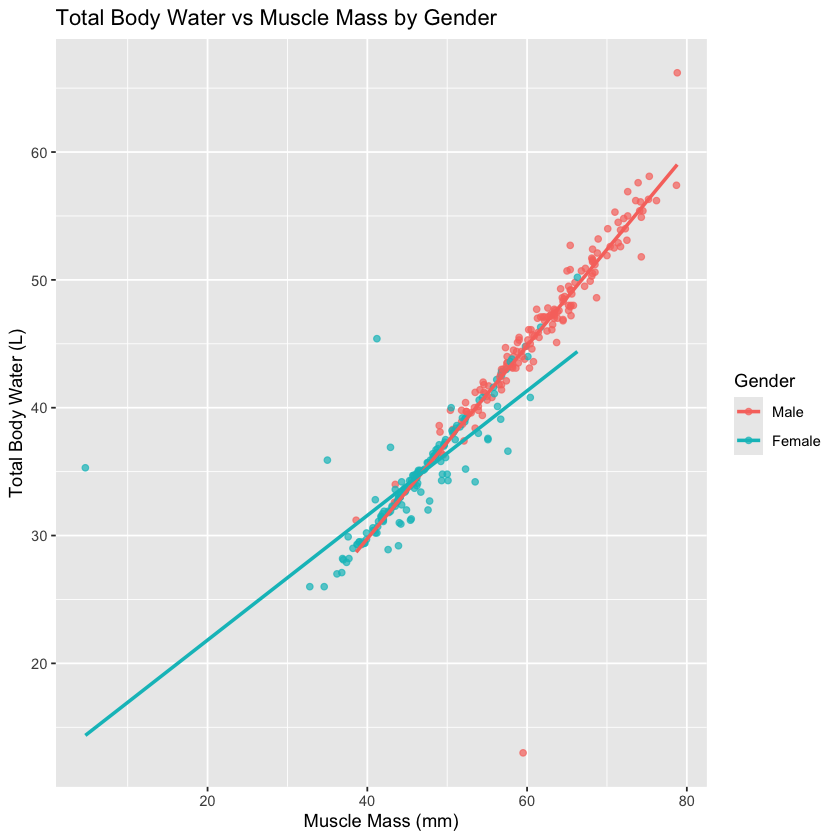

In [45]:
ggplot(df, aes(x = musclemassmm, y = totalbodywatertbw, color = gender)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Total Body Water vs Muscle Mass by Gender",
    x = "Muscle Mass (mm)",
    y = "Total Body Water (L)",
    color = "Gender"
  ) 


**Relevancy**: 

This plot is relevant as it let's us explore as someone get's more muscle mass, how is this associated with how much water is in their body. We also want to see how this changes between gender.

**Results:**

We can see a possitive association with muscle mass and total body water which makes sense as more muscle = more water. Additionally, we can see that Males on average have more body water along with more muscle mass.

### Residual diagnostic plots

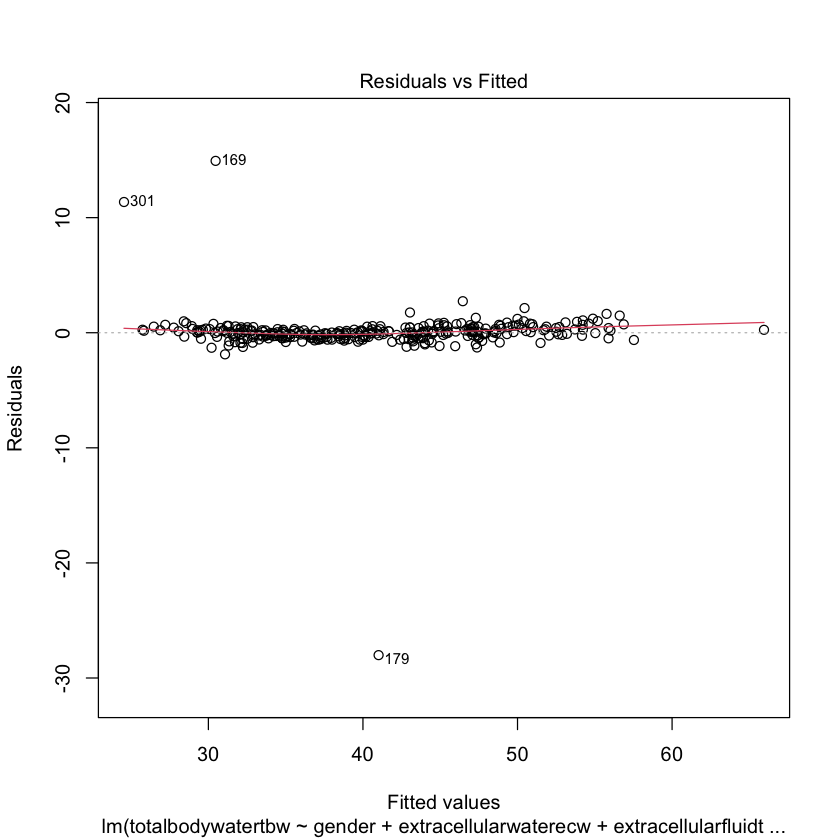

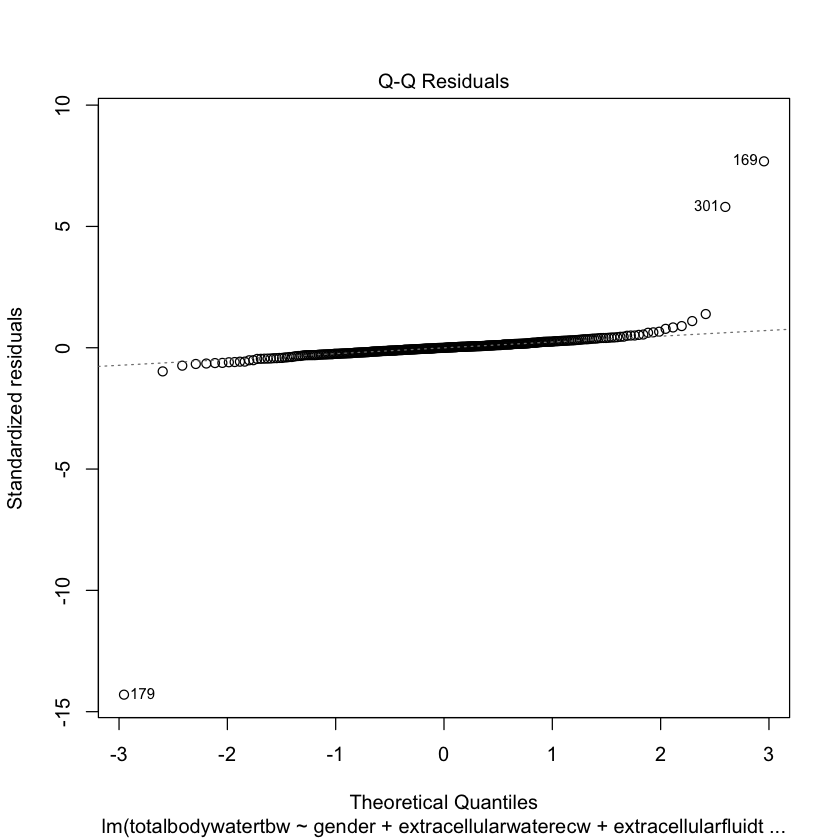

In [50]:
plot(model, which = 1)
plot(model, which = 2)


Looking at the diagnostic plots, our model satisfies the assumptions of linear regression. 

Residuals show no major heteroscedasticity or nonlinearity, and the QQ plot confirms approximate normality. These results support the validity of inference for the final model.

# Section 4: Method and Plan

### Appropiateness
The method I chose is to use a multiple linear regression model to examine how lean mass, total body fat ratio, gender, height, weight, and BMI are associated with a person’s total body water (totalbodywatertbw).

This method is appropriate because the response variable is continuous, and the goal is to quantify how several body composition variables collectively explain variation in total body water.

### Assumptions
The assumptions of this method include linear relationships between factors and the response, independent observations, constant variance of residuals, and approximately normally distributed errors.

### Limitations
A potential limitation is that several predictors (height, weight, BMI, and lean mass) may collinear here which can inflate standard errors and might make it hard to interpret the individual coefficients.

Another limitation is that the model assumes linearity; however, physiological relationships may be nonlinear or involve interactions.

# Section 5: Computational Code and Output

In [51]:
model <- lm(formula = totalbodywatertbw ~ gender + extracellularwaterecw + extracellularfluidtotalbodywaterecftbw + musclemassmm + visceralmuscleareavmakg, data = df)

summary(model) %>% tidy(conf.int = TRUE)
summary(model)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),34.44094243,3.02747669,11.3761214,2.498116e-25,28.48416399,40.3977209
genderFemale,0.04683711,0.34824263,0.1344956,8.930971e-01,-0.63835535,0.7320296
extracellularwaterecw,2.33863118,0.13404327,17.4468373,4.323713e-48,2.07489138,2.6023710
extracellularfluidtotalbodywaterecftbw,-0.83414268,0.06791354,-12.2824211,1.439999e-28,-0.96776746,-0.7005179
musclemassmm,-0.00957481,0.03969965,-0.2411812,8.095726e-01,-0.08768672,0.0685371
visceralmuscleareavmakg,0.06351747,0.05155515,1.2320295,2.188628e-01,-0.03792101,0.1649559



Call:
lm(formula = totalbodywatertbw ~ gender + extracellularwaterecw + 
    extracellularfluidtotalbodywaterecftbw + musclemassmm + visceralmuscleareavmakg, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.0123  -0.3281  -0.0066   0.3097  14.9322 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            34.440942   3.027477  11.376   <2e-16
genderFemale                            0.046837   0.348243   0.134    0.893
extracellularwaterecw                   2.338631   0.134043  17.447   <2e-16
extracellularfluidtotalbodywaterecftbw -0.834143   0.067914 -12.282   <2e-16
musclemassmm                           -0.009575   0.039700  -0.241    0.810
visceralmuscleareavmakg                 0.063517   0.051555   1.232    0.219
                                          
(Intercept)                            ***
genderFemale                              
extracellularwaterecw                 

### Interpretation

We can see that extracellularwaterecw and extracellularfluidtotalbodywaterecftbw have statistical signifiance in our model while the other variables have p-values that suggest less signifiance.